### Name: Syed Asghar Abbas Zaidi
### ID: sz07201

# movies-1.csv and movies-2.csv

Import libraries here

In [400]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

Read datasets here

In [403]:
df = pd.read_csv('movies-1.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,In a city of coaching centers known to train I...


In [405]:
df_2 = pd.read_csv('movies-2.csv')
df_2.head(5)

,show_id,rating,duration,listed_in,score,votes,popularity
0,s1,PG-13,90 min,Documentaries,7.4,6636,7.2
1,s2,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",6.6,3180,6.3
2,s3,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",7.0,2640,6.9
3,s4,TV-MA,1 Season,"Docuseries, Reality TV",6.7,229,7.0
4,s5,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9.1,71138,9.4


Q1. Join datasets to include all the columns in both datasets (Hint: Find the common column to merge these datasets) <br>
Display few records after joining. **(no explanation needed)**

In [409]:
# merged_df = pd.merge(df3, df_2[['id', 'stroke']], on='id', how='inner')
df_merged = pd.merge(df, df_2, on='show_id', how='inner') #this ensures even that those with incomplete info doesn't get included
df_merged.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,description,rating,duration,listed_in,score,votes,popularity
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,"As her father nears the end of his life, filmm...",PG-13,90 min,Documentaries,7.4,6636,7.2
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,"After crossing paths at a party, a Cape Town t...",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",6.6,3180,6.3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,To protect his family from a powerful drug lor...,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",7.0,2640,6.9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,"Feuds, flirtations and toilet talk go down amo...",TV-MA,1 Season,"Docuseries, Reality TV",6.7,229,7.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,In a city of coaching centers known to train I...,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9.1,71138,9.4


Q2. Display the number of rows/columns and data types of each column **(no explanation needed)**

In [412]:
df_merged.shape

(8810, 15)

8810 columns and 15 rows

In [415]:
df_merged.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
description      object
rating           object
duration         object
listed_in        object
score           float64
votes             int64
popularity      float64
dtype: object

Q3. Find and display if there are duplicates in the dataset. If yes, then in the next step, remove the duplicates and display the number of rows/columns again. **(no explanation needed)**

In [419]:
duplicate_rows_df = df_merged[df_merged.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (3, 15)


In [421]:
sum(df.duplicated())

3

In [423]:
df2 = df_merged.drop_duplicates()
sum(df2.duplicated())

0

Q4. Find all the columns with missing values by displaying the total number of missing records for each column.**(no explanation needed)**

In [426]:
df2.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
description        0
rating             4
duration           3
listed_in          0
score              0
votes              0
popularity         0
dtype: int64

Q5. If there are missing values in any column, replace it with value "Unknown" (except duration column). <br>
Replace "duration" column missing values with "0 mins". <br>
Display the total number of missing values again to show that there are no missing values exist. **(no explanation needed)**

In [430]:
# df3['smoking_status'] = df3['smoking_status'].replace('?', 'unknown')
# loc is a more safer way, iloc is indexing focused.
# df2.loc[:, 'director'] = df2['director'].replace('', 'Unknown')
# df2.loc[:, 'cast'] = df2['cast'].replace('', 'Unknown')
# df2.loc[:, 'country'] = df2['country'].replace('', 'Unknown')
# df2.loc[:, 'date_added'] = df2['date_added'].replace('', 'Unknown')
# df2.loc[:, 'duration'] = df2['duration'].replace('', '0 mins')


columns_to_fill = ['director', 'cast', 'country' , 'rating', 'date_added']
df2[columns_to_fill] = df2[columns_to_fill].fillna("unknown")
# Display the updated DataFrame
df2.isnull().sum()



C:\Users\DELL\AppData\Local\Temp\ipykernel_27280\2660887015.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[columns_to_fill] = df2[columns_to_fill].fillna("unknown")


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
description     0
rating          0
duration        3
listed_in       0
score           0
votes           0
popularity      0
dtype: int64

In [432]:
df2['duration'] = df2['duration'].fillna('0 mins')
df2.isnull().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_27280\4157726426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['duration'] = df2['duration'].fillna('0 mins')


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
description     0
rating          0
duration        0
listed_in       0
score           0
votes           0
popularity      0
dtype: int64

Q6. Count the number of records for each rating. Do you see any issues in rating values? **Please discuss/explain your findings**

In [436]:
df2['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
unknown        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Yes, there are some issues to be observed here. Why are there entries with the name of "74 min",  "84 min" and "66 min" in rating section. And only 1 entry of them exists, I am assuming there was a human error when making an entry!

Q7. Find the percentage of records released in 2018. (Hint: use column **release_year**) **(no explanation needed)**

In [440]:
df2['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [442]:
Total_Count = df2['release_year'].count()
Total_Count

8807

In [444]:
Records_in_2018 = df2['release_year'].value_counts().get(2018)
Records_in_2018

1147

In [446]:
Percentage_of_2018_Records = (Records_in_2018/Total_Count) * 100
print(f"Percentage of Records released in 2018: {Percentage_of_2018_Records:.2f}%")

Percentage of Records released in 2018: 13.02%


Q8. Split the **"duration"** column and create two new columns **"minutes"** and **"unit"** based on the duration value. Display few results. **(no explanation needed)**

In [449]:
df2['duration'].head(10)

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
5     1 Season
6       91 min
7      125 min
8    9 Seasons
9      104 min
Name: duration, dtype: object

In [451]:
df3 = df2
df3.loc[:, 'duration'] = df3['duration'].astype(str)
df3[['minutes', 'unit']] = df3['duration'].str.extract(r'(\d+)\s*(\w+)', expand=True)
df3.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_27280\987864370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['minutes', 'unit']] = df3['duration'].str.extract(r'(\d+)\s*(\w+)', expand=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_27280\987864370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['minutes', 'unit']] = df3['duration'].str.extract(r'(\d+)\s*(\w+)', expand=True)


,show_id,type,title,director,cast,country,date_added,release_year,description,rating,duration,listed_in,score,votes,popularity,minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,25-Sep-21,2020,"As her father nears the end of his life, filmm...",PG-13,90 min,Documentaries,7.4,6636,7.2,90,min
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,"After crossing paths at a party, a Cape Town t...",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",6.6,3180,6.3,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,24-Sep-21,2021,To protect his family from a powerful drug lor...,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",7.0,2640,6.9,1,Season
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,24-Sep-21,2021,"Feuds, flirtations and toilet talk go down amo...",TV-MA,1 Season,"Docuseries, Reality TV",6.7,229,7.0,1,Season
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,In a city of coaching centers known to train I...,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9.1,71138,9.4,2,Seasons


Q9. Find the maximum duration in column **"minutes"** (Hint: check for the data type for column "minute" column and convert accordingly). **(no explanation needed)**

In [455]:
df3.loc[:, 'minutes'] = pd.to_numeric(df3['minutes'], errors='coerce')
max_duration = df3['minutes'].max()
max_duration

312

Q10. Find all the records which have minutes greater than 200. Display the records and report the total number of records. **(no explanation needed)**

In [460]:
gt_200_mins = df3['minutes'] > 200
GT_200 = df3[gt_200_mins]
GT_200

,show_id,type,title,director,cast,country,date_added,release_year,description,rating,duration,listed_in,score,votes,popularity,minutes,unit
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States",1-Sep-21,1984,Director Sergio Leone's sprawling crime epic f...,R,229 min,"Classic Movies, Dramas",4.2,22120,4.4,229,min
717,s718,Movie,Headspace: Unwind Your Mind,unknown,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",unknown,15-Jun-21,2021,"Do you want to relax, meditate or sleep deeply...",TV-G,273 min,Documentaries,7.1,155,7.3,273,min
806,s807,Movie,Seven Souls in the Skull Castle: Season Moon J...,Hidenori Inoue,"Sota Fukushi, Taichi Saotome, Shohei Miura, Ke...",unknown,2-Jun-21,2017,"Japan, 1590. Wandering samurai band together t...",TV-14,204 min,"Action & Adventure, Dramas, International Movies",6.1,22579,5.9,204,min
807,s808,Movie,Seven Souls in the Skull Castle: Season Moon K...,Hidenori Inoue,"Mamoru Miyano, Hiroki Suzuki, Tomoki Hirose, R...",unknown,2-Jun-21,2017,"Japan, 1590. Wandering samurai band together t...",TV-PG,212 min,"Action & Adventure, Dramas, International Movies",6.8,13945,6.9,212,min
1019,s1020,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...","India, United Kingdom",17-Apr-21,2001,"In 1890s India, an arrogant British commander ...",PG,224 min,"Dramas, International Movies, Music & Musicals",6.7,14523,6.9,224,min
2126,s2127,Movie,What's Your Raashee?,Ashutosh Gowariker,"Harman Baweja, Priyanka Chopra, Manju Singh, A...",India,15-Aug-20,2009,"To protect his family from ruin, Yogesh must m...",TV-PG,203 min,"Comedies, International Movies, Music & Musicals",6.0,13553,6.4,203,min
2483,s2484,Movie,Fifty Year Old Teenager,Fouad Al Shatti,"Abdulhussain Abdulredah, Haifaa Adel, Dawood H...",unknown,21-May-20,1996,The life of a married 50-year-old doctor turns...,TV-14,204 min,"Comedies, International Movies",6.1,7778,6.4,204,min
2484,s2485,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",unknown,21-May-20,1982,A widower believes he must marry off his three...,TV-PG,233 min,"Comedies, International Movies, Romantic Movies",6.2,24102,6.4,233,min
2487,s2488,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,21-May-20,1979,Hoping to prevent their father from skipping t...,TV-14,237 min,"Comedies, Dramas, International Movies",6.8,15348,6.3,237,min
2488,s2489,Movie,Raya and Sakina,Hussein Kamal,"Suhair El-Babili, Shadia, Abdel Moneim Madboul...",unknown,21-May-20,1984,When robberies and murders targeting women swe...,TV-14,230 min,"Comedies, Dramas, International Movies",5.6,23130,5.6,230,min


Q11. What is the Average (mean) minutes of records whose **type** is **Movie**? Display the average **(no explanation needed)**

In [463]:
average_minutes = df3[df3['type'] == 'Movie']['minutes'].mean()
print(f"Average (mean) minutes of records whose type is Movie: {average_minutes:.2f} mins")

Average (mean) minutes of records whose type is Movie: 99.53 mins


Q12. Which individual country has the Highest number of type TV Shows? Display the output **(no explanation needed)**

In [466]:
tv_show_counts = df3[df3['type'] == 'TV Show'].groupby('country').size()
highest_tv_shows_country = tv_show_counts.idxmax(), tv_show_counts.max()
print(highest_tv_shows_country)

('United States', 760)


Q13. For movie **title** '3 Idiots', what is the Show Id and Who is the Director of this show ? Display the output **(no explanation needed)**

In [469]:
movie_info = df3[df3['title'] == '3 Idiots'][['show_id', 'director']]
movie_info

,show_id,director
1114,s1115,Rajkumar Hirani


Q14. Using Bar Graph, display the total number of movies released each year. Display only top 10 in descending order. (both types in column  **type**)<br>
In your bar graph, which year the highest number of the movies were released?

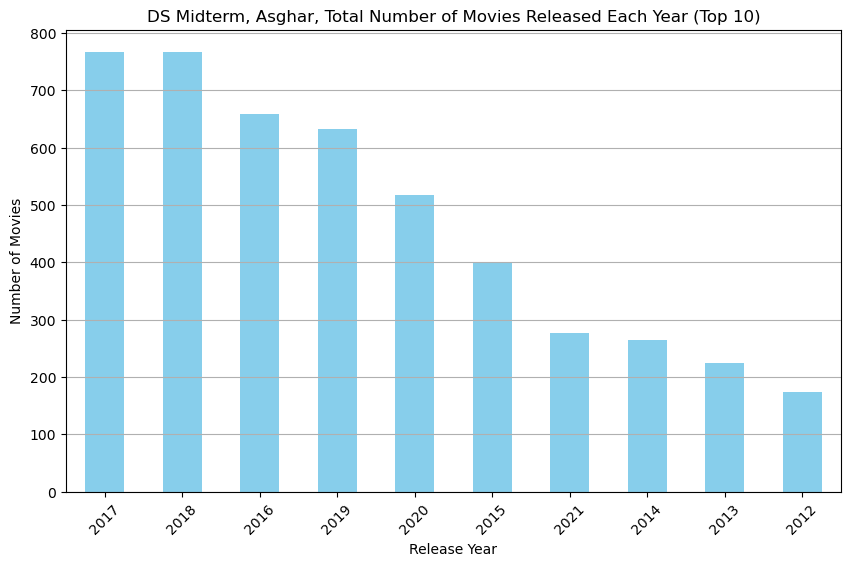

Year with the highest number of movies released: (2017, 767)


In [472]:
movies_per_year = df3[df3['type'] == 'Movie'].groupby('release_year').size()
# Get the top 10 years with the highest number of movies and creating a bar graph
top_10_movies_per_year = movies_per_year.nlargest(10)
plt.figure(figsize=(10, 6))
top_10_movies_per_year.plot(kind='bar', color='skyblue')
plt.title('DS Midterm, Asghar, Total Number of Movies Released Each Year (Top 10)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
highest_year = top_10_movies_per_year.idxmax(), top_10_movies_per_year.max()
print("Year with the highest number of movies released:", highest_year)

Q15. Display Top 5 Directors, who directed the highest number of TV Shows & Movies ? **(no explanation needed)**

In [475]:
top_directors = df3.groupby('director').size().nlargest(6)
top_directors

director
unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
dtype: int64

In [477]:
#Remember how we filled the values of director with "unknown", it would showcase it on the top, thus we aren't showcasing the top one which would be null
TD = df3.groupby('director').size().nlargest(6).iloc[1:]
TD

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
dtype: int64

Q16. In how many movies/shows, Tom Cruise was casted? Display the records **(no explanation needed)**

In [480]:
TC_records = df3[df3['cast'].str.contains('Tom Cruise', na=False)]
TC_records

,show_id,type,title,director,cast,country,date_added,release_year,description,rating,duration,listed_in,score,votes,popularity,minutes,unit
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,1-Aug-21,1999,"Through chance, history and divine interventio...",R,189 min,"Dramas, Independent Movies",4.3,12904,4.2,189,min
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,1-Mar-21,1988,"Motivated by money, a selfish workaholic seeki...",R,134 min,"Classic Movies, Dramas",5.8,25711,5.6,134,min


Q17. Create a distribution plot (histogram) for **ratings** TV-14 and TV-MA and **type** (Hint: use **x** for rating and **hue** for type) <br>
**(no explanation needed)**

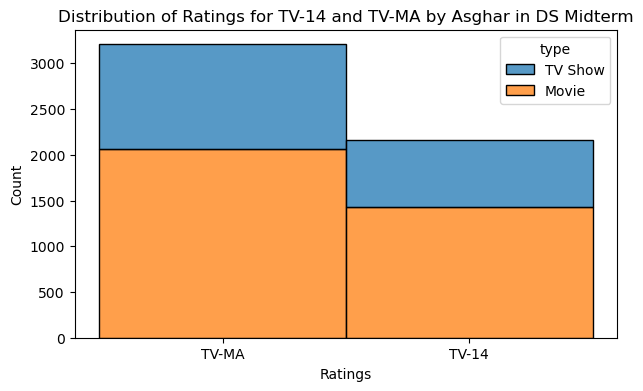

In [483]:
filtered_data = df3[df3['rating'].isin(['TV-14', 'TV-MA'])]
plt.figure(figsize=(7, 4))
sns.histplot(data=filtered_data, x='rating', hue='type', multiple='stack', bins=10)
plt.title('Distribution of Ratings for TV-14 and TV-MA by Asghar in DS Midterm')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

Q18. Use a boxplot visualisation technique to see the highest, lowest and average **score** with the **type**? **Briefly explain your boxplot**

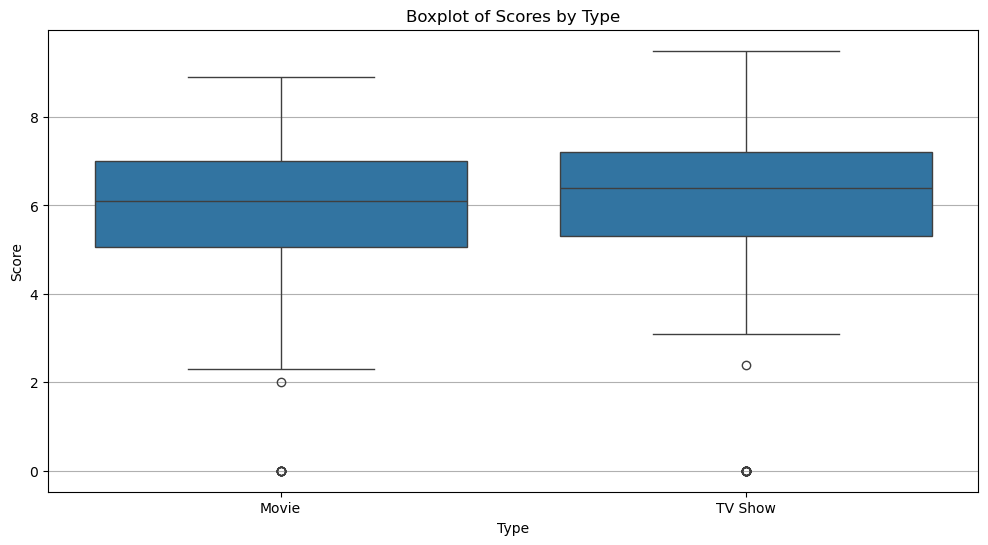

In [486]:
# Create a boxplot for scores by type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='type', y='score')

plt.title('Boxplot of Scores by Type')
plt.xlabel('Type')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

There are few outliers where people have rated "0" to Movie and TV-show. Overall, it seems that people tend to rate TV-shows higher than the movies as can be inferred from the fact the "median" of the score of TV-Show is higher

Q19. Use any visualization technique (think of any suitable plot) which can justify/show that "As the **score** increases, the **popularity** also increases proportionally". **Explain your findings in your plot**

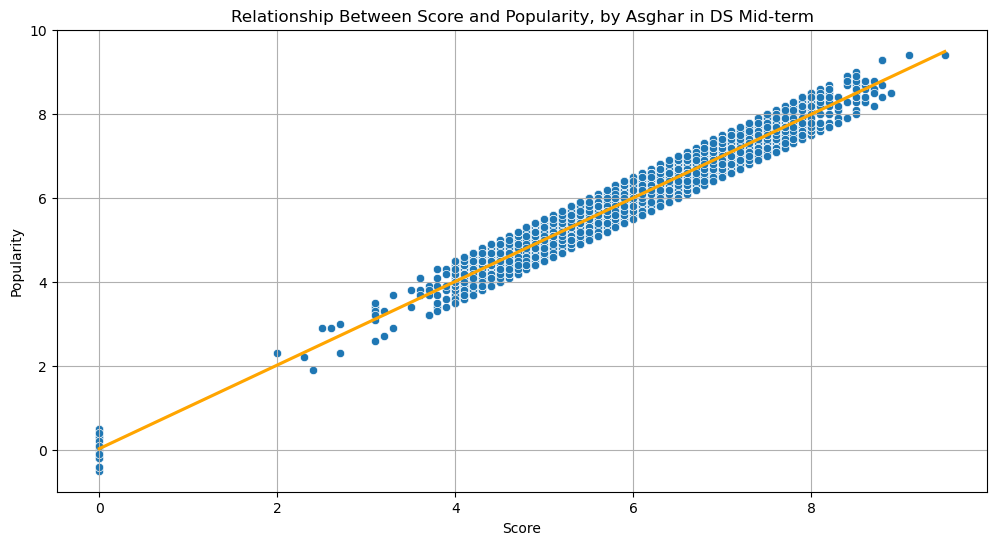

In [490]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df3, x='score', y='popularity')
sns.regplot(data=df3, x='score', y='popularity', scatter=False, color='orange', line_kws={'label': 'Trend Line'})
plt.title('Relationship Between Score and Popularity, by Asghar in DS Mid-term')
plt.xlabel('Score')
plt.ylabel('Popularity')
plt.grid()
plt.show()

We can clearly see that there is a very strong correlation between the score and popularity, the highly popular a show is, there is a very strong likelihood that it will recieve a greater score as well!

Q20. Generate a correlation plot between **score** and **popularity**. **Briefly explain your findings?**

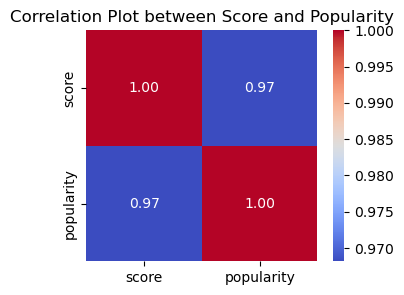

In [493]:
correlation_matrix = df3[['score', 'popularity']].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Plot between Score and Popularity')
plt.show()

Our suspicions are only proved right considering the fact that the correlation between the "Score" and "Popularity" is 0.97 which suggests a strong positive linear relationship between the two variables.

Q21. Test the Hypothesis and explain your findings: <br> H0: the score of **type** = TV Show and **type** = Movie is same (equal or similar). <br>
Ha: the score of **type** = TV Show is greater than **type** = Movie <br>
**Briefly explain your conclusion**

In [498]:
TV_S = df3[df3['type'] == 'TV Show']['score']
M_S = df3[df3['type'] == 'Movie']['score']
stats.ttest_ind(TV_S, M_S, alternative='greater')

TtestResult(statistic=7.393432583833722, pvalue=7.808967875701054e-14, df=8805.0)

### Analysis 
The hypothesis test results indicate a test statistic of 7.39 and a p-value of approximately 7.81 x 10^-14, which is significantly lower than the 0.05 significance level. Therefore, 
**we reject the null hypothesis**, 
concluding that the average score of TV Shows is greater than that of Movies. This suggests a notable difference in viewer reception, with TV Shows in the dataset generally receiving higher ratings compared to Movies.

The higher average scores for TV Shows compared to Movies may be due to several different varying factors. TV Shows often have more extended narratives and character development, allowing for deeper storytelling that can engage audiences over time, and if someone is commiting a long period of their time watching a tv-show, they might be more biased to rate it highly while for someone who didn't like the show, they have a high likelihood to just drop it or not get invested in the first place, but they can watch the movie cause they are pretty short or may have paid for a ticket of it in a cinema.

Q22. Test the Hypothesis and explain your findings: <br> H0: **type** and **country** are independent and are not related to each other <br>
Ha: **type** and **country** are dependent and related to each other <br>
**Briefly explain your conclusion**

In [502]:
contingency_table = pd.crosstab(df3['type'], df3['country'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
chi2_stat, p_value

(1843.1924665342528, 6.511460628402204e-94)

### Analysis 
The Chi-square test results indicate a chi-square statistic of 1843.19 and a p-value of approximately 6.511460628402204e-94, which is significantly lower than the 0.05 significance level. 
**This leads us to reject the null hypothesis**, concluding that **type** and **country** are dependent and related to each other. 

Factors like local language, societal norms, and popular genres can influence the types of shows and movies produced and favored in each country. Additionally, streaming platforms may cater to regional preferences, further shaping the diversity of content available to viewers in different nations. Like consider Pakistan, the way animation is looked "on" upon is VASTLY different than how is "animation" is looked on in countries like "United States" or most importantly "Japan". One another example we can think of is how these countries consume "explicit content" 

# Thank you so much!